# 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액

   + 국가통계포털 : https://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01#SelectStatsBoxDiv
    

## K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?


   + k-beauty란? : https://en.wikipedia.org/wiki/K-Beauty
   + e: 추정치, p: 잠정치, -: 자료없음, ...: 미상자료, x:비밀보호, ▽: 시계열 불연(단위:백만원)

# 필요 라이브러리 가져오기

In [39]:
# 라이브러리 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [72]:
# 시각화를 위한 폰트 설정
import os

if os.name == "nt":
    sns.set(font="Malgun Gothic")


In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

# 데이터 로드하기

In [27]:
df_raw = pd.read_csv("국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201024105624.csv", encoding="cp949")
df_raw

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,833672,897205,921586,974060,1250236,1344404,1525396,1879499,1525487,1273753
1,합계,합계,면세점,-,-,-,-,-,-,-,...,665613,725319,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,168059,171886,159750,203404,179543,187246,189024,223864,227997,221766
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,5236,3854,4320,4511,3702,4038,3670,3826,4142,3776
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,2,6,1,215,2,0,1,70,113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,...,665,469,504,589,465,488,308,531,384,334
447,기타,기 타,계,765,735,849,804,788,805,724,...,1067,1063,1120,770,711,689,469,1094,939,710
448,기타,기 타,면세점,-,-,-,-,-,-,-,...,272,316,404,0,0,1,0,1,0,0


In [23]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

중국            45
중남미           45
중동            45
합계            45
아세안(ASEAN)    45
기타            45
대양주           45
EU            45
미국            45
일본            45
Name: 국가(대륙)별, dtype: int64

In [24]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"]== "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,42679,40207,37631,48978,40918,44861,55386,53848,48277,63218
46,미국,합계,면세점,-,-,-,-,-,-,-,...,5184,3603,2317,2079,2657,2951,1818,1481,698,339
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,37495,36604,35314,46899,38261,41910,53568,52367,47579,62879
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,2033,1553,1784,1774,1298,1408,1653,1382,1182,1594
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,1,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,2033,1553,1784,1773,1298,1408,1653,1382,1182,1594
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,1737,1716,1723,1886,1845,1837,3166,1785,1830,2759
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,65,38,72,52,66,116,107,49,12,2
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,1672,1678,1651,1834,1779,1721,3059,1736,1818,2757
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,175,251,172,269,88,156,118,338,135,182


# 분석과 시각화를 위한 tidy data 만들기


In [21]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4 p)'],
      dtype='object')

In [22]:
df_raw.values

array([['합계', '합계', '계', ..., 1879499, 1525487, 1273753],
       ['합계', '합계', '면세점', ..., 1655635, 1297490, 1051987],
       ['합계', '합계', '면세점 이외', ..., 223864, 227997, 221766],
       ...,
       ['기타', '기 타', '계', ..., 1094, 939, 710],
       ['기타', '기 타', '면세점', ..., 1, 0, 0],
       ['기타', '기 타', '면세점 이외', ..., 1093, 939, 710]], dtype=object)

In [26]:
df= df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                var_name="기간", value_name="백만원")
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
11695,기타,생활용품 및 자동차용품,면세점,2020 2/4 p),0
11696,기타,생활용품 및 자동차용품,면세점 이외,2020 2/4 p),334
11697,기타,기 타,계,2020 2/4 p),710
11698,기타,기 타,면세점,2020 2/4 p),0


In [28]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  11700 non-null  object
 1   상품군별     11700 non-null  object
 2   판매유형별    11700 non-null  object
 3   기간       11700 non-null  object
 4   백만원      11700 non-null  object
dtypes: object(5)
memory usage: 457.2+ KB


# 데이터 전처리

## 기간에서 연도를 분리하기

In [31]:
int("2019 4/4".split()[0])

2019

In [32]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [33]:
# 기간에서 분기만 분리하기
"2019 1/4".split()[1].split("/")[0]

'1'

In [36]:
# 분기 컬럼 만들기
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


## 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [44]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기

df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


## 필요없는 데이터 제거하기

In [57]:
# 합계 데이터는 다로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
11695,기타,생활용품 및 자동차용품,면세점,2020 2/4 p),0.0,2020,2
11696,기타,생활용품 및 자동차용품,면세점 이외,2020 2/4 p),334.0,2020,2
11697,기타,기 타,계,2020 2/4 p),710.0,2020,2
11698,기타,기 타,면세점,2020 2/4 p),0.0,2020,2


In [60]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

## 전체 상품군 판매액

In [70]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별  == "계" 데이터만 가져와서 봐야지
# 평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있습니다.

df_total = df[df["판매유형별"] =="계"]
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


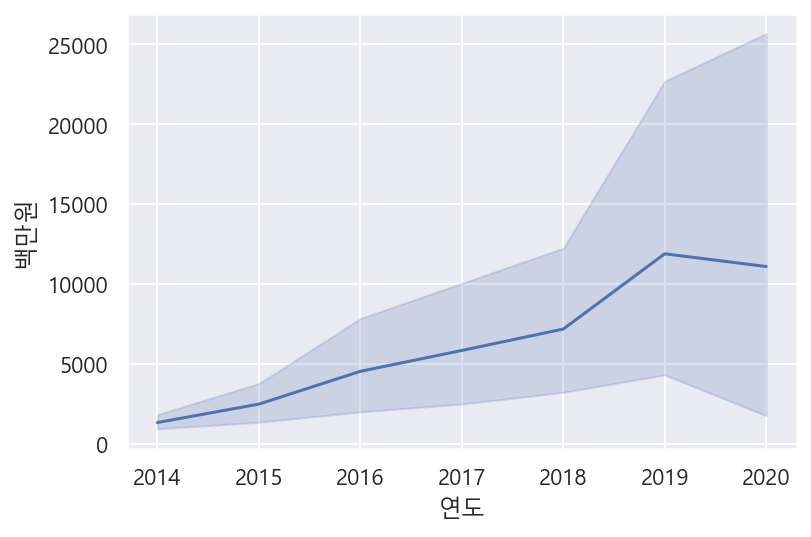

In [73]:
# 연도, 판매액 lineplot 으로 그리기
sns.lineplot(data=df_total, x="연도", y="백만원")

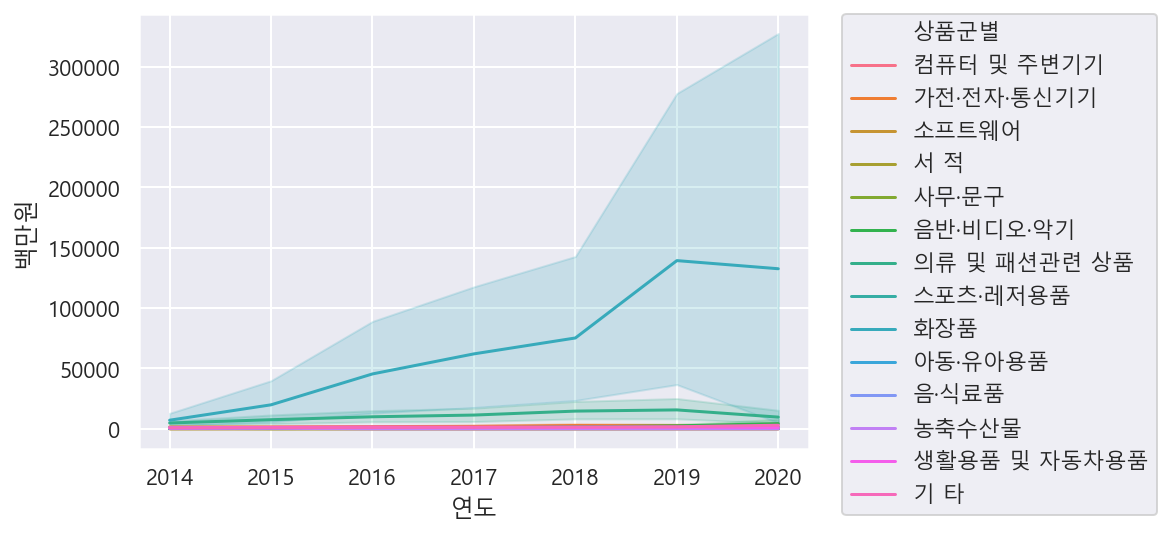

In [75]:
# 연도, 금액(milion) 판매액 lineplot 으로 그리고 상품군별로 다른 색상으로 표시하기

sns.lineplot(data=df_total, x="연도", y="백만원", hue= "상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

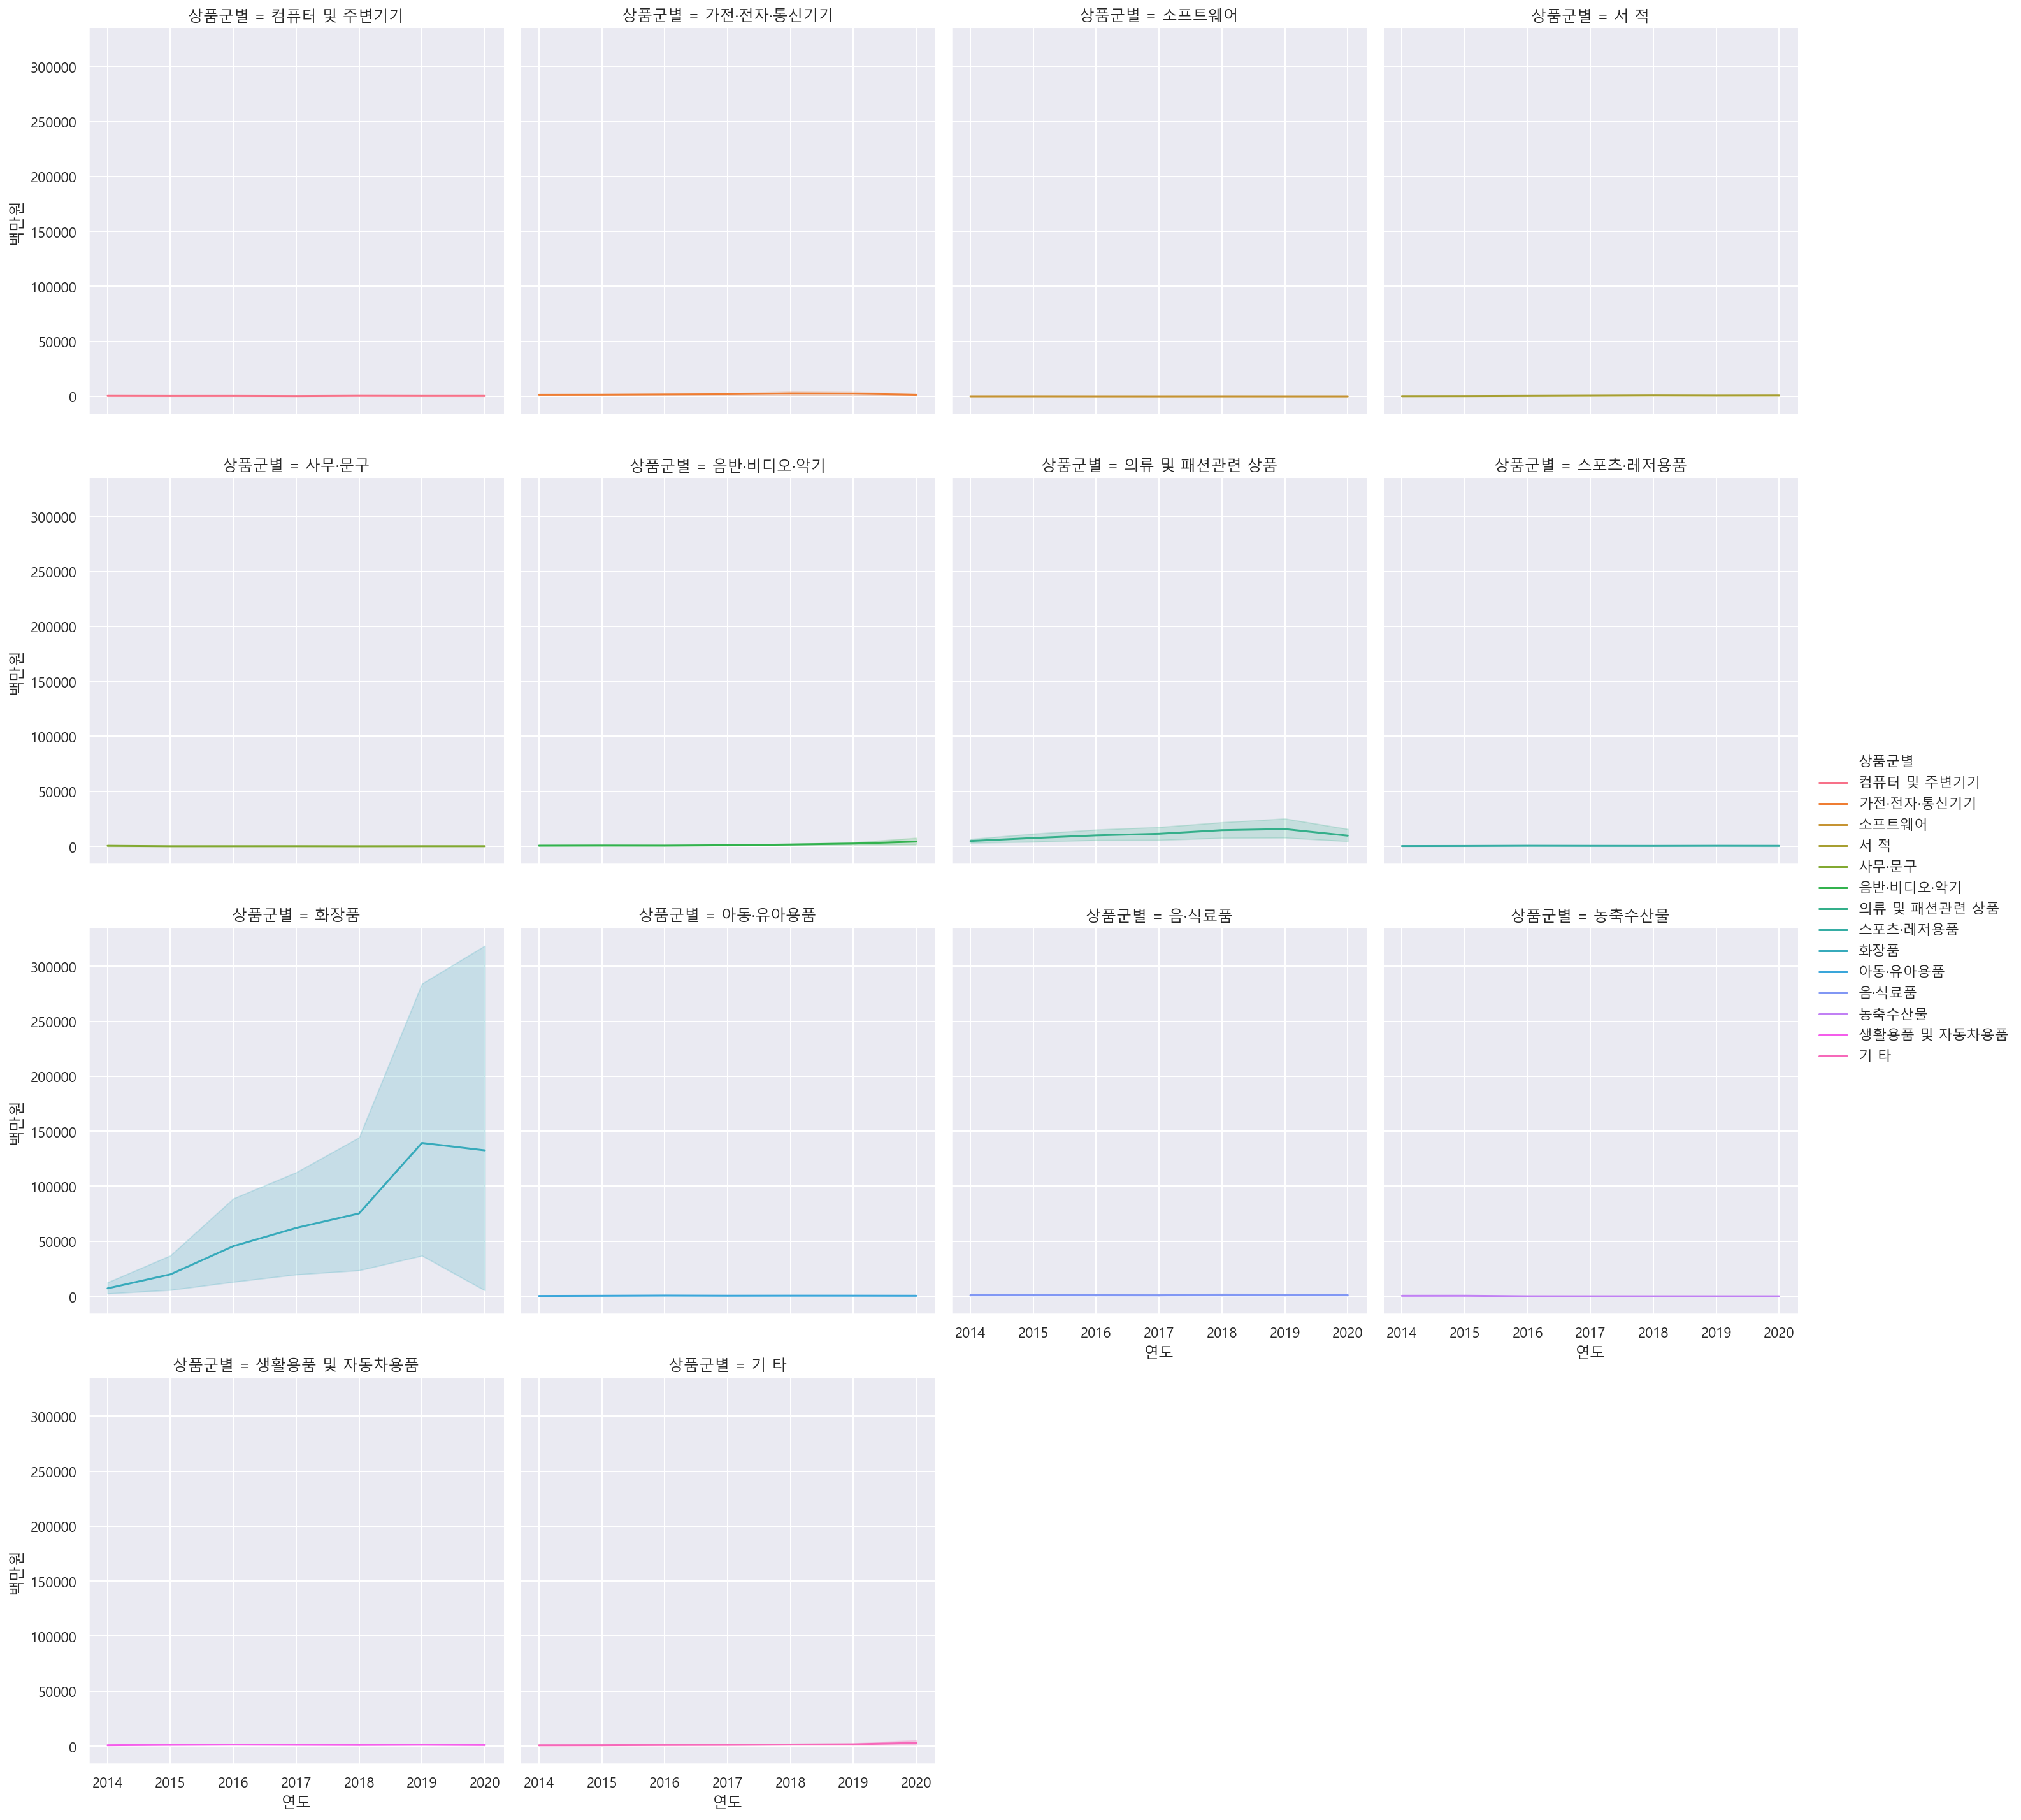

In [81]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기

sns.relplot(data=df_total, x="연도", y="백만원", 
            hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [89]:
# isin을 사용해 화장품만 제외를 하고 df_sub 라는 변수에 담습니다.

df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()

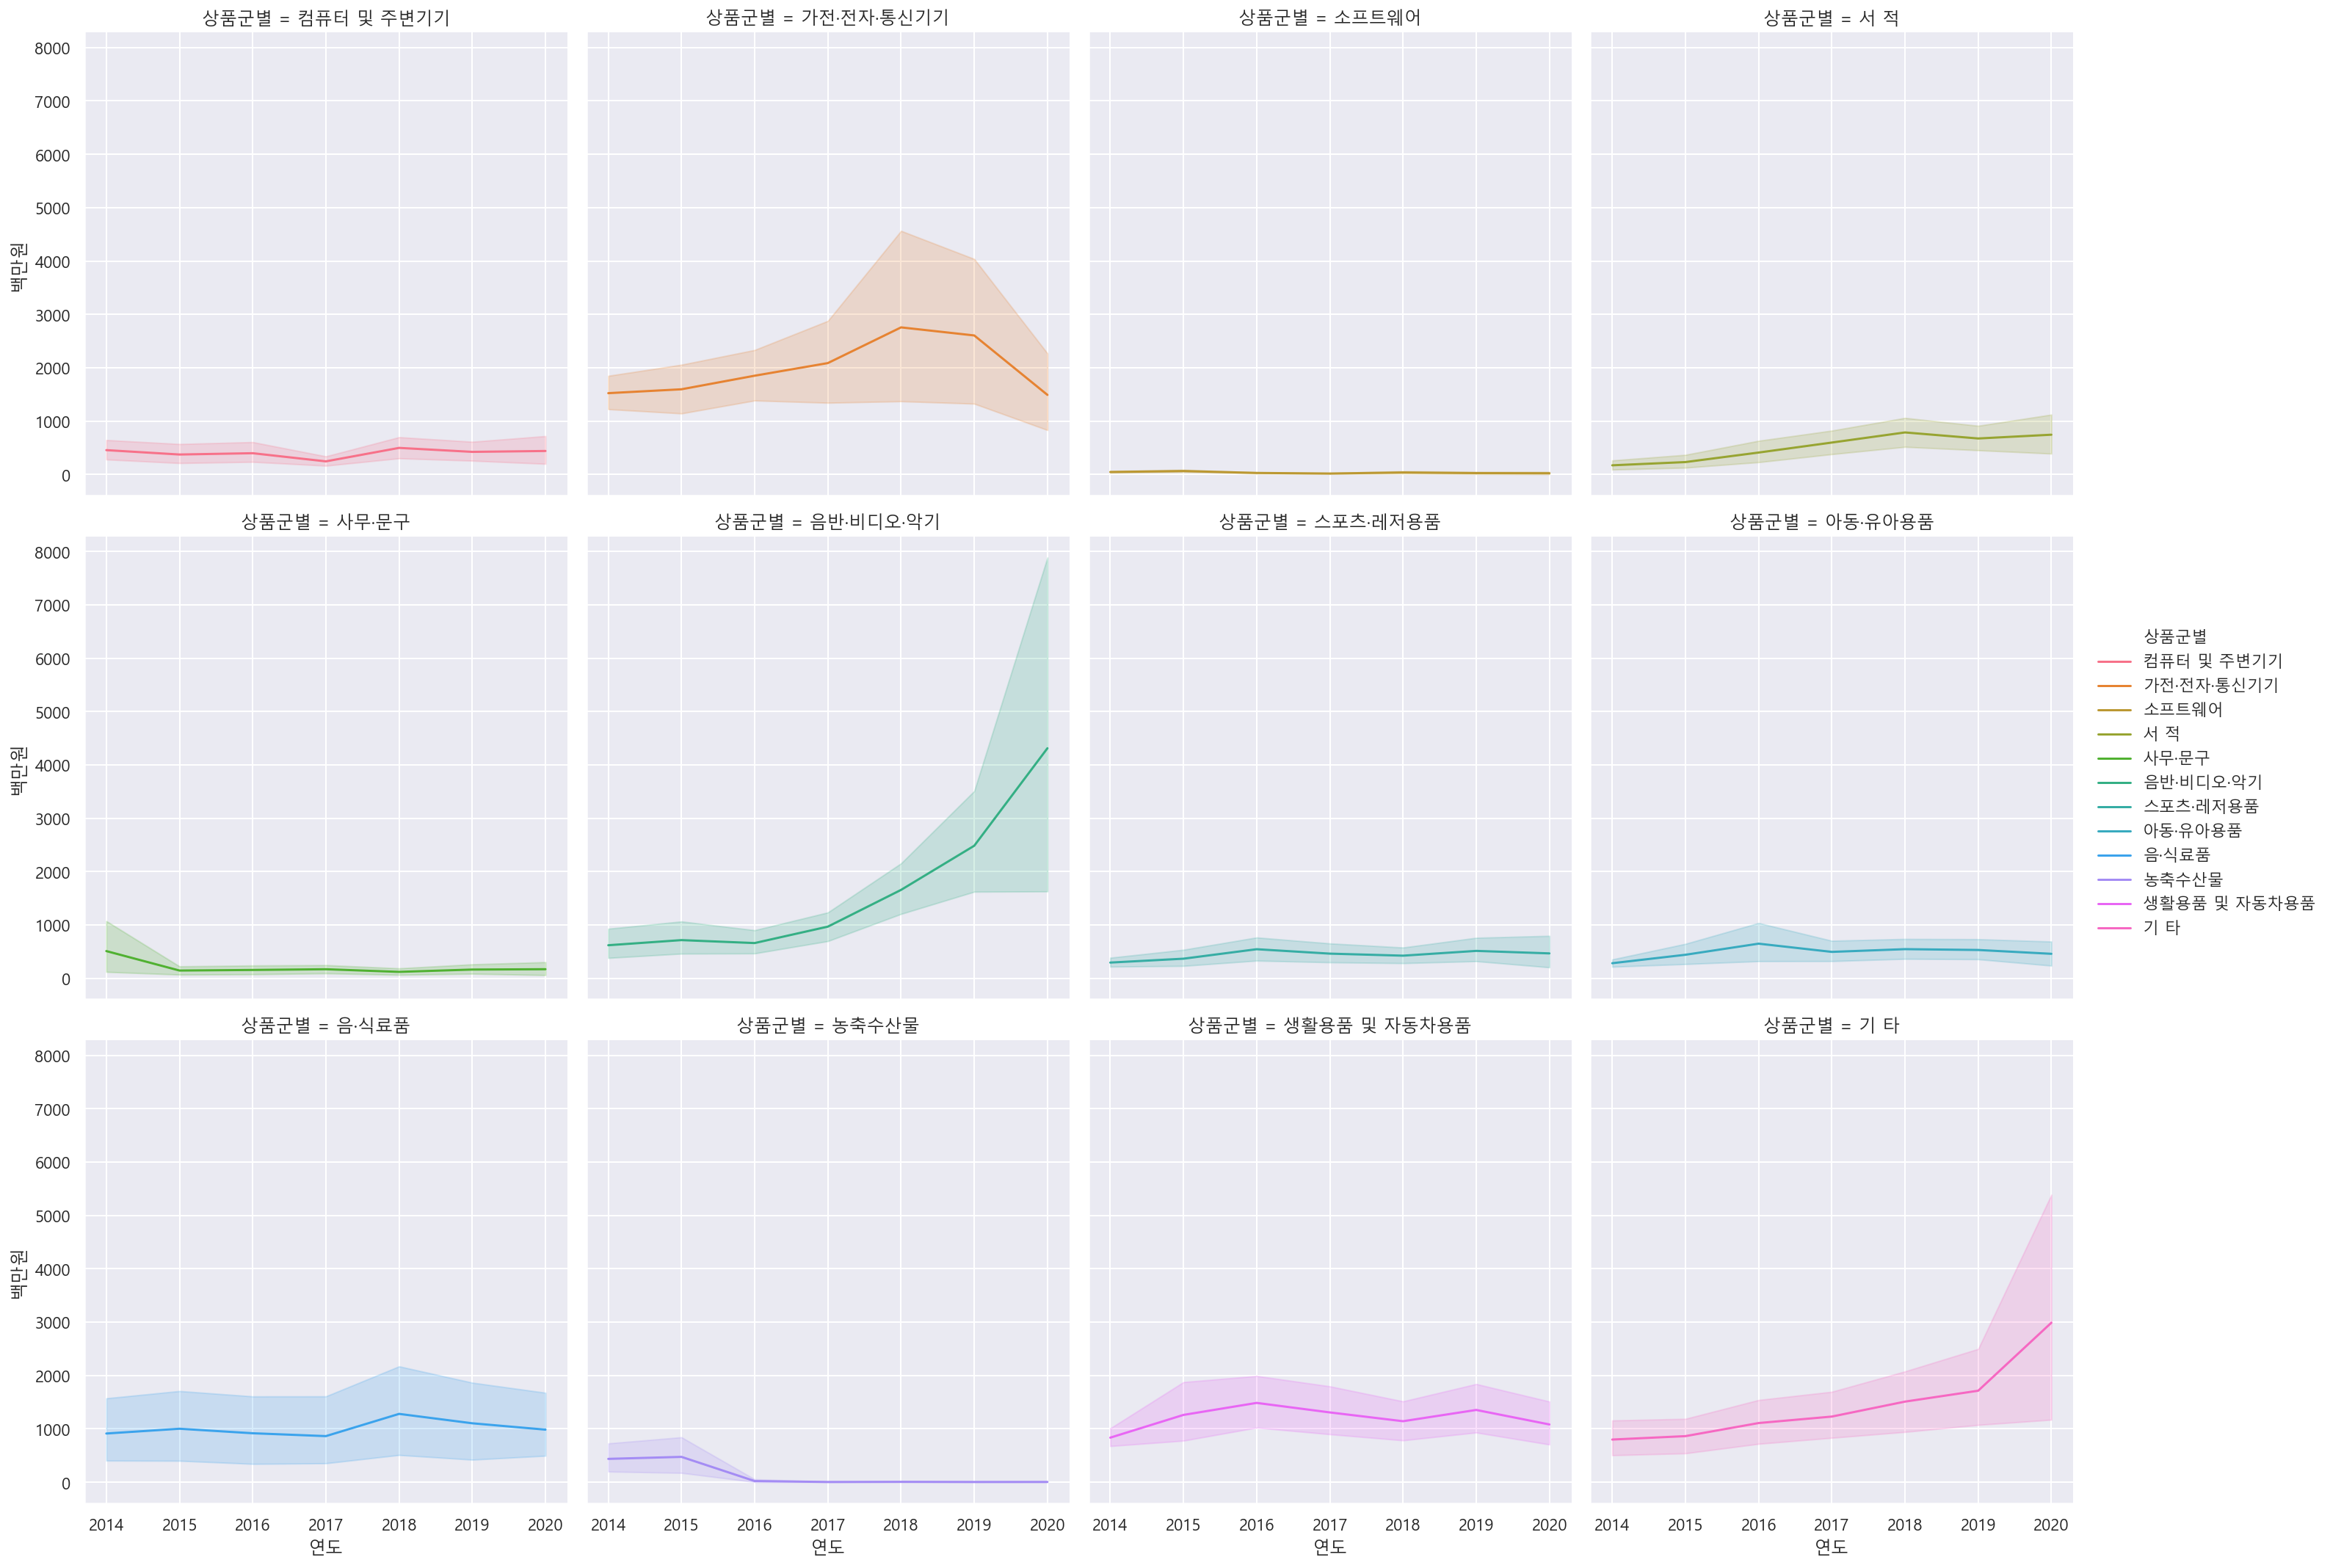

In [90]:
# 연도별 판매액을 상품군별로 relplot을 활용해 서브플롯으로 그려보기

sns.relplot(data=df_sub, x="연도", y="백만원", 
            hue= "상품군별", col="상품군별", col_wrap=4, kind="line")

## 화장품의 온라인쇼핑 해외직접판매액

In [102]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기

df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

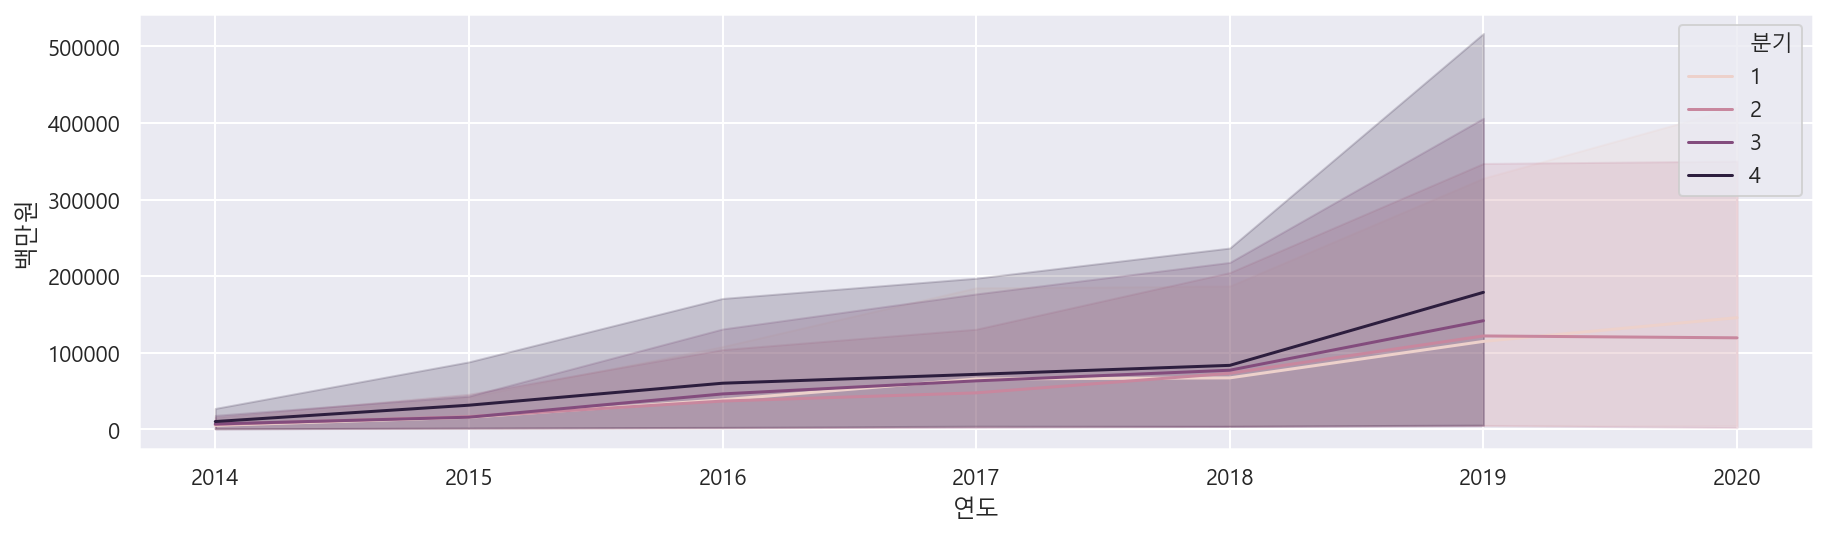

In [106]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상을 표현해보기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원",hue="분기")

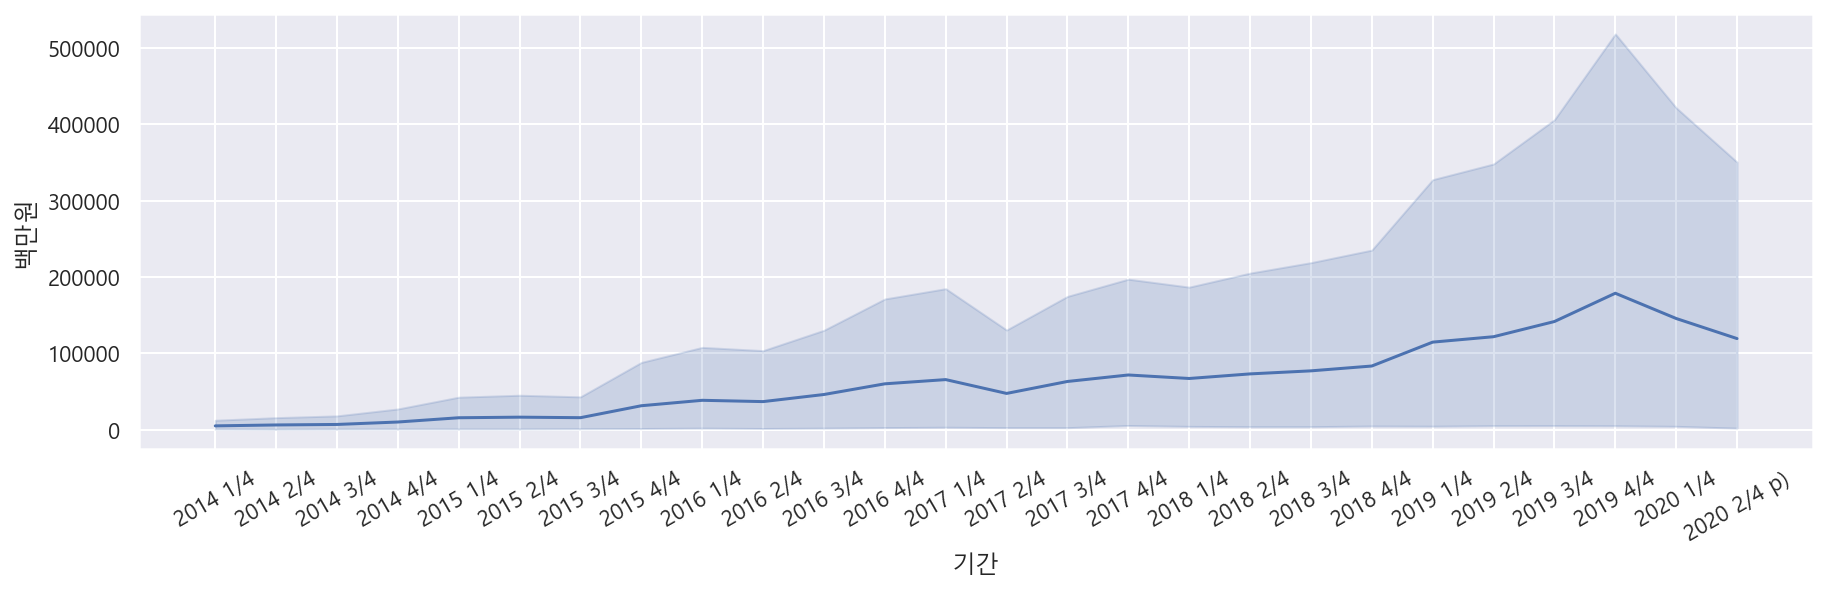

In [109]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

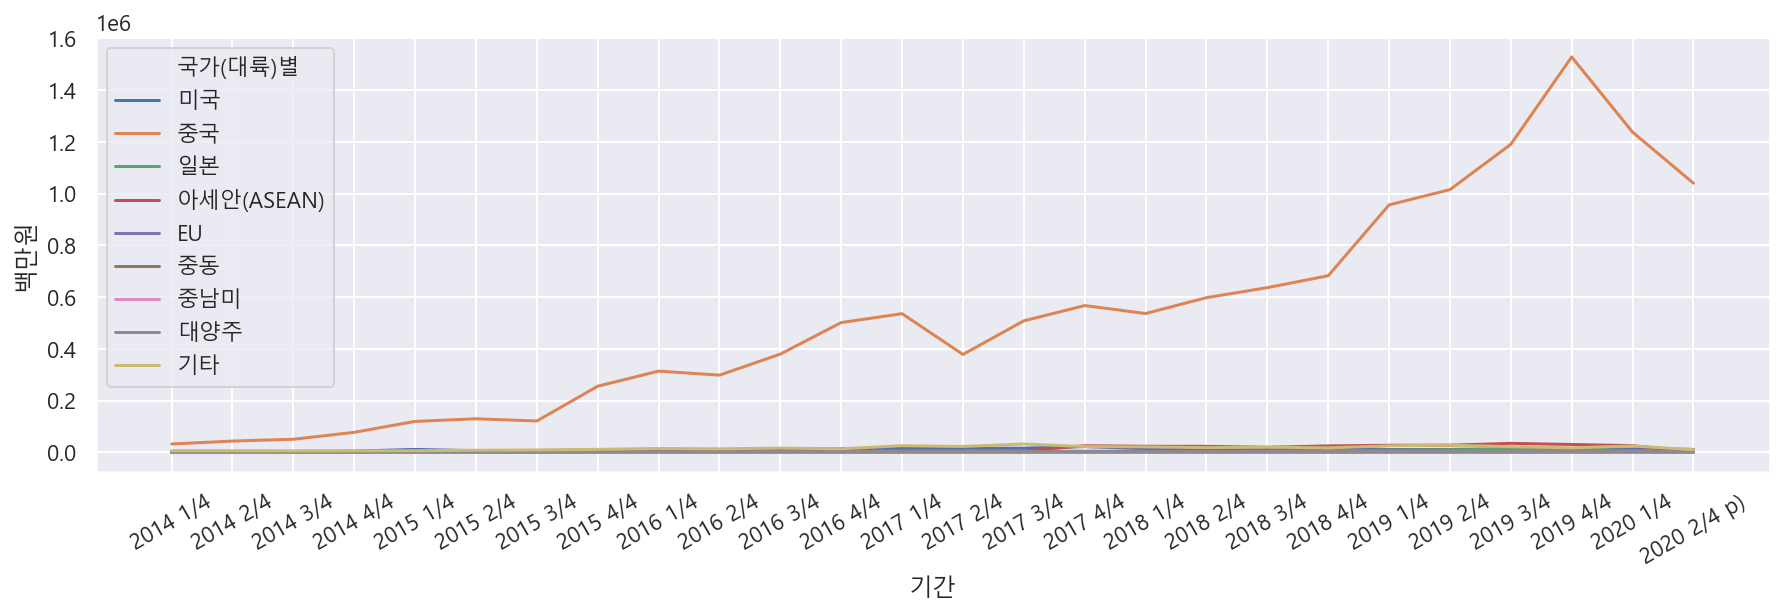

In [110]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

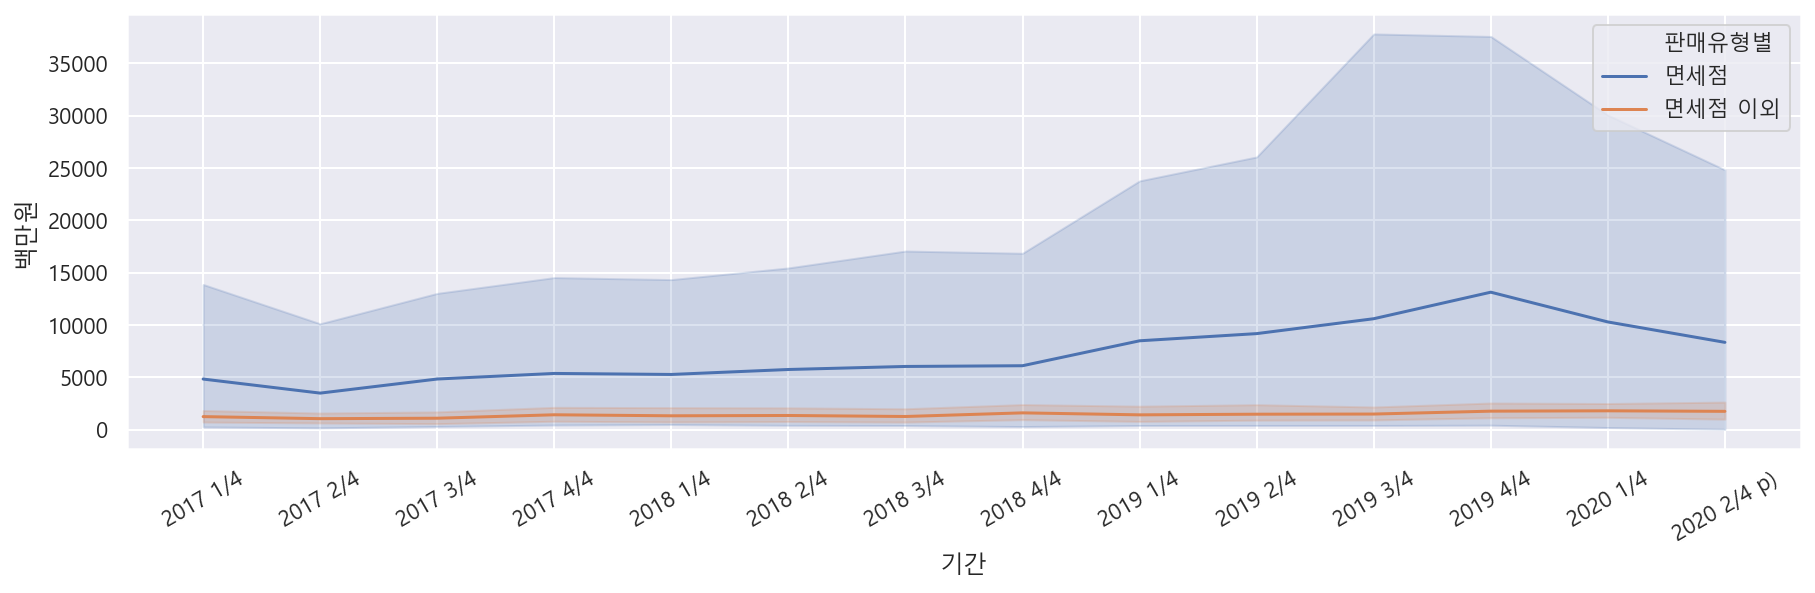

In [118]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sum = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sum, x="기간", y="백만원", hue="판매유형별")

## 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [132]:
# df_fashion 이라는 변수에 의류데이터만 가져와 따로 담아주기

df_fashion = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


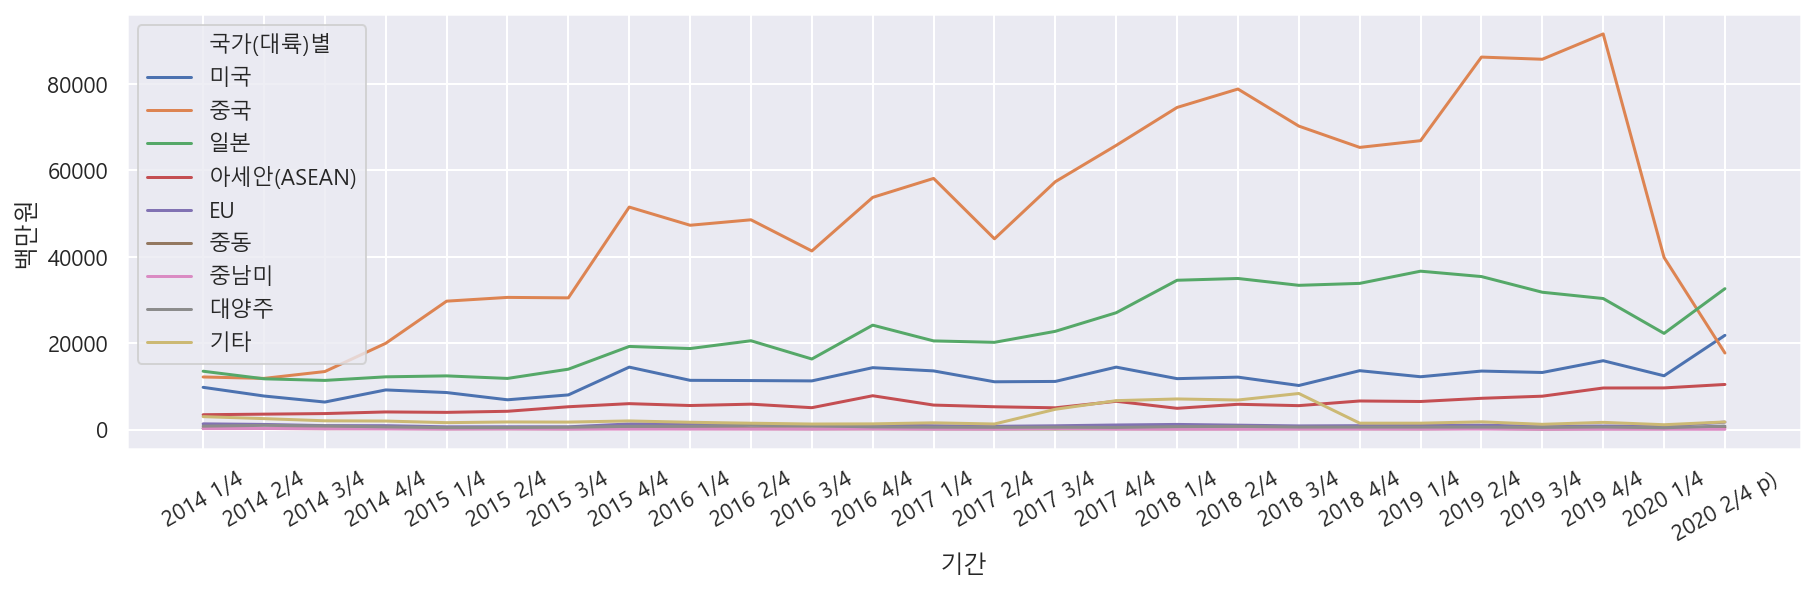

In [135]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "국가(대륙)별" 로 다른 색상으로 표시하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data= df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

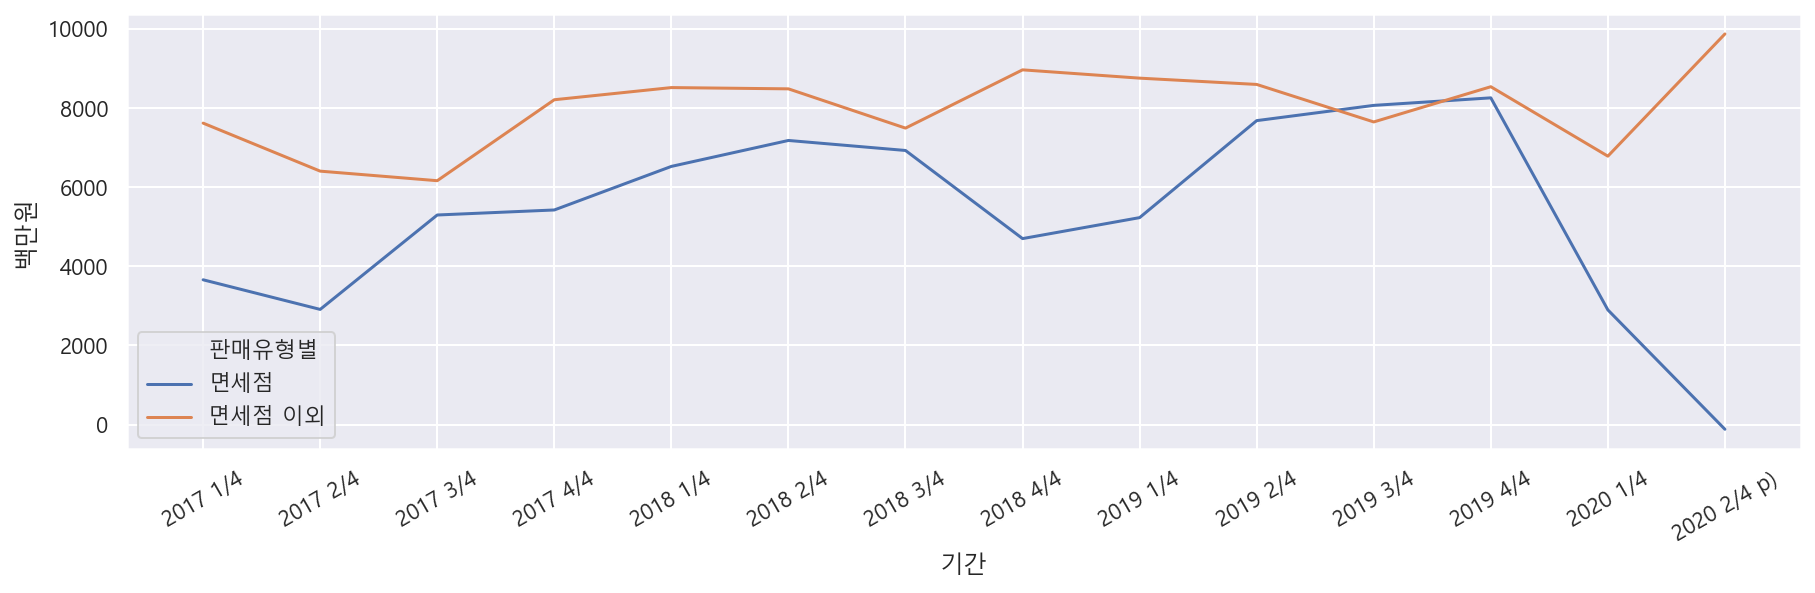

In [138]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기

df_fashion2 = df[(df["상품군별"] == "의류 및 패션관련 상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data= df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

## 데이터 집계하기

In [144]:
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1


In [146]:
# 피봇테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기

result = df_fashion.pivot_table(index="국가(대륙)별", 
                       columns="연도", values="백만원", aggfunc="sum")

## 연산결과를 시각적으로 보기

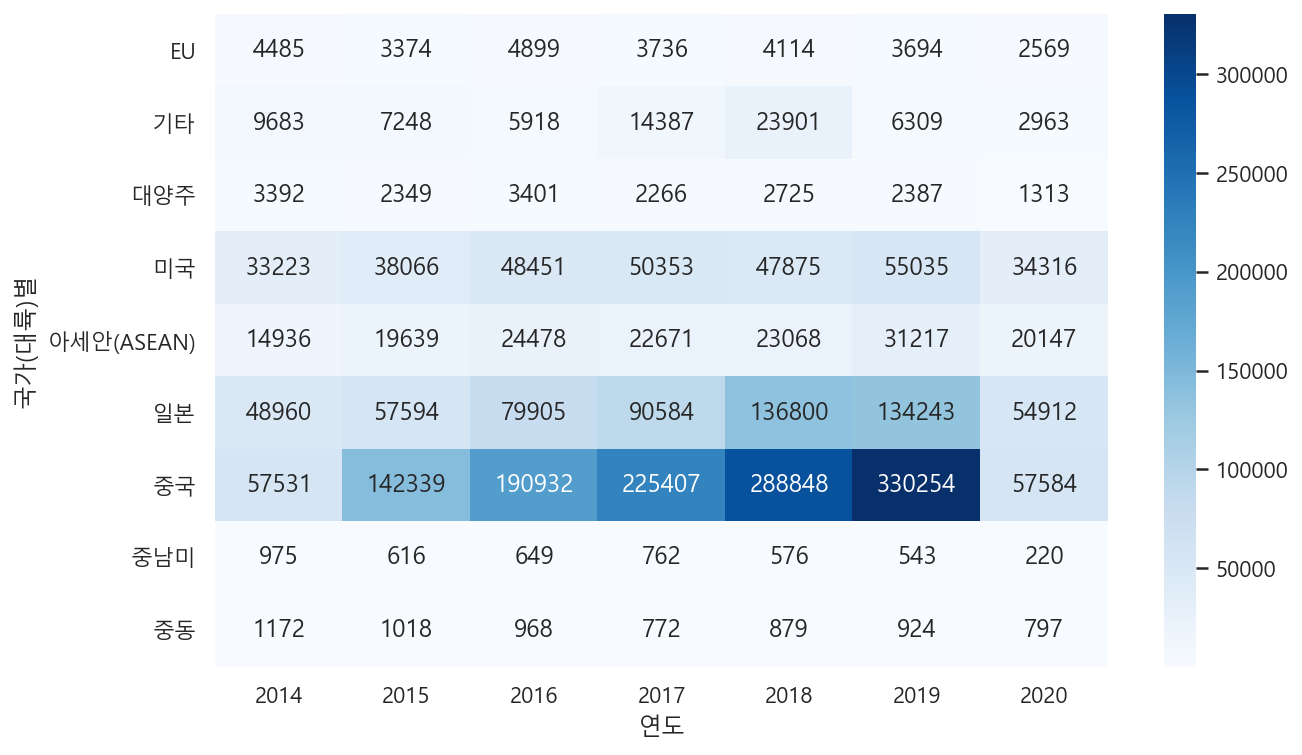

In [152]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기
plt.figure(figsize=(10,6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

# 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

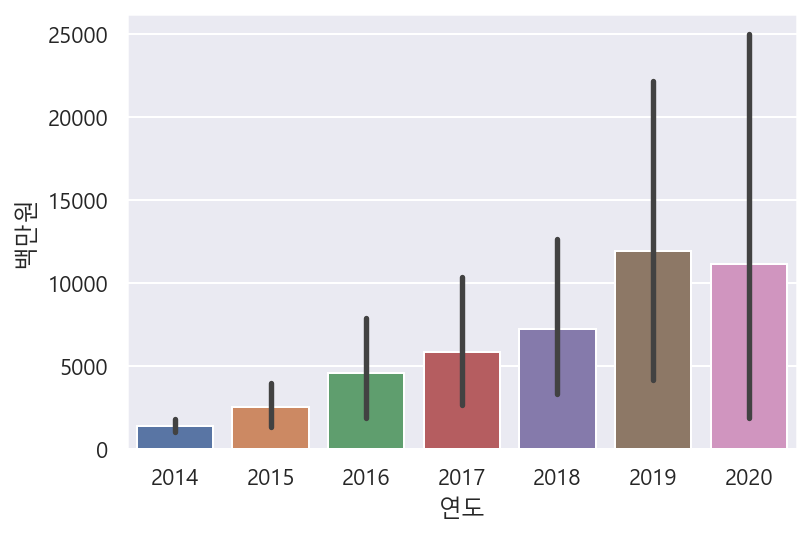

In [157]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

sns.barplot(data=df_total, x="연도", y="백만원")

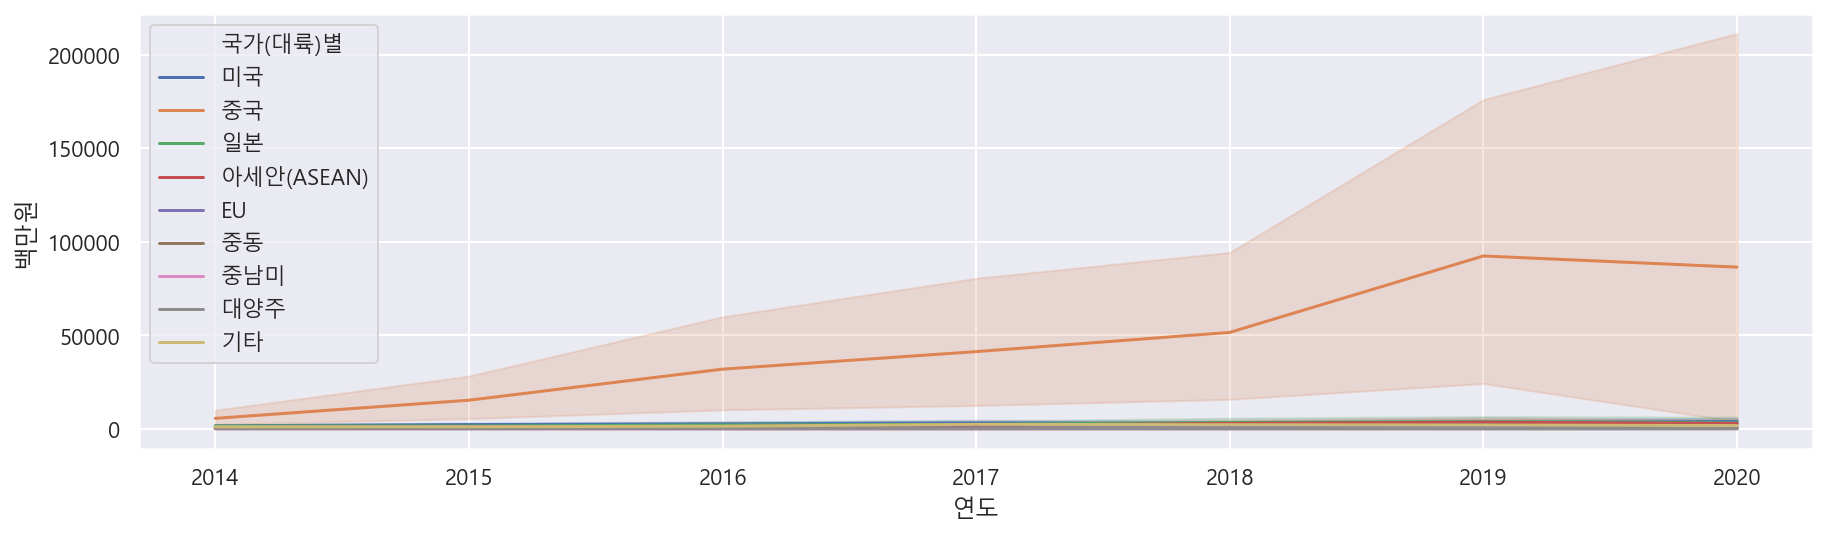

In [160]:
# 연도별 판매액을 그리고 "국가(대륙)별 " 로 다른 색상으로 표현하기

plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

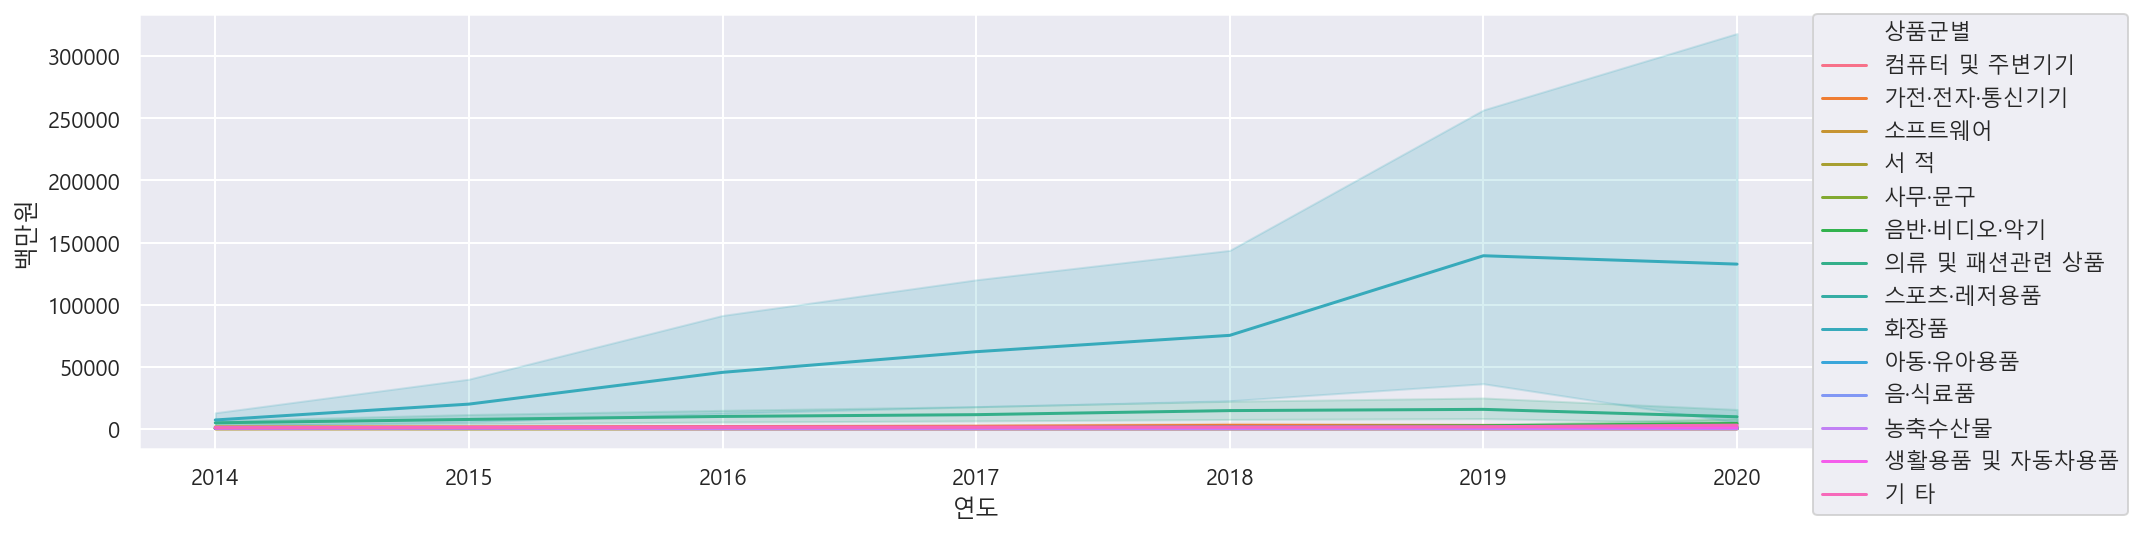

In [163]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기

plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)